In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into python environment

In [281]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Make ‘PassengerId’ as the index column

In [275]:
data=pd.read_csv('titanic_dataset.csv', index_col='PassengerId')

In [276]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check the basic details of the dataset

In [277]:
data.shape

(891, 11)

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [279]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [280]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

findings:
    1 The dataset contains 891 rows and 11 columns
    2 Columns like Age,Cabin and embarked contains  177,687,2 null values respectively

# Fill in all the missing values present in all the columns in the dataset

In [282]:
#drope some columns
data.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


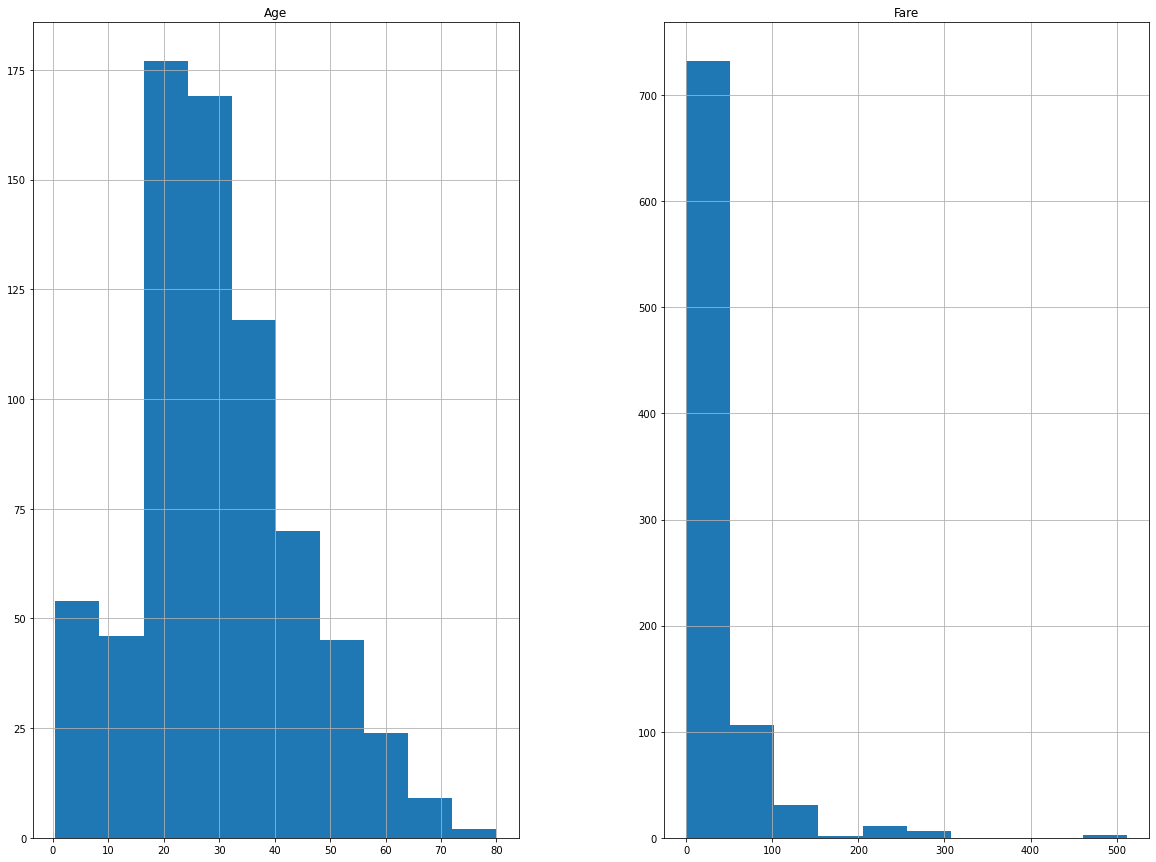

In [283]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

Age is positively Skewed so we can use median to fillup missing values

In [204]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [205]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [206]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [207]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Use encoding techniques to change categorical data into numerical value

In [268]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
data['Sex']= label.fit_transform(data['Sex']) 
print(data['Sex'].unique())

[1 0]


In [269]:
data2=pd.get_dummies(data['Embarked'])

In [270]:
data=pd.concat([data, data2], axis=1)

In [271]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
PassengerId,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S,0,0,1
2,1,1,0,38.0,1,0,71.2833,C,1,0,0
3,1,3,0,26.0,0,0,7.9250,S,0,0,1
4,1,1,0,35.0,1,0,53.1000,S,0,0,1
5,0,3,1,35.0,0,0,8.0500,S,0,0,1


In [214]:
data.drop('Embarked', axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,0
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1


# Check and handle outliers in at least 3 columns in the datase

checking outliers using box plot

Text(0.5, 1.0, 'Box plot of Age')

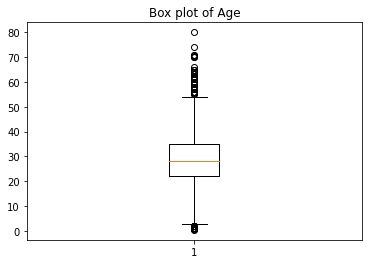

In [215]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

Handling outliers using IQR Technique

In [216]:
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')

In [217]:
Q1,Q2,Q3

(22.0, 28.0, 35.0)

In [218]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [219]:
print(low_lim,up_lim)

2.5 54.5


In [220]:
outlier=[]
for x in data['Age']:
 if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [221]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [222]:
ind1=data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [223]:
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [224]:
ind2=data['Age']<low_lim
data.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [225]:
data.drop([ 8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

In [226]:
data.shape

(825, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cda8465b20>,
 'caps': [<matplotlib.lines.Line2D at 0x1cda8474280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cda8465790>],
 'medians': [<matplotlib.lines.Line2D at 0x1cda84749a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cda8474d30>],
 'means': []}

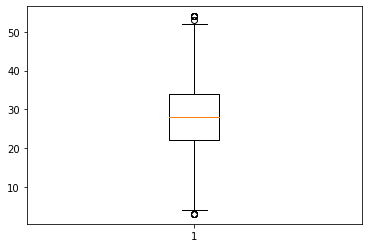

In [227]:
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cda84d32b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cda84d39d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cda84c4ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cda84de130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cda84de4c0>],
 'means': []}

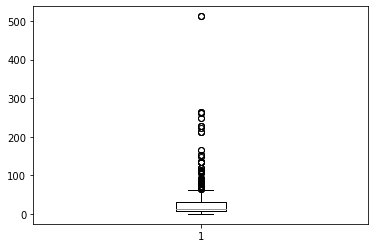

In [228]:
plt.boxplot(data['Fare'])

In [229]:
q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')

In [230]:
print(q1)
print(q2)
print(q3)

7.8958
13.4167
30.0708


In [231]:
iqr=q3-q1
l_lim=q1-1.5*iqr
u_lim=q3+1.5*iqr

In [232]:
print(l_lim)
print(u_lim)

-25.366699999999994
63.333299999999994


In [233]:
outlier=[]
for x in data['Fare']:
 if((x>u_lim) or (x<l_lim)):
    outlier.append(x)

In [234]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [235]:
ind1=data['Fare']>u_lim
data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [238]:
data.drop(data.loc[ind1].index,inplace=True)

In [239]:
ind2=data['Fare']<l_lim
data.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

In [240]:
data.shape

(718, 10)

Text(0.5, 1.0, 'Box plot of Fare')

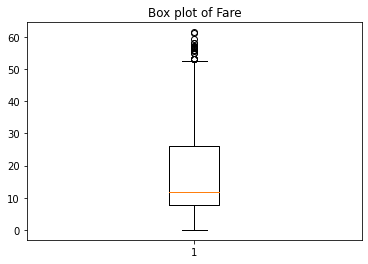

In [241]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

Text(0.5, 1.0, 'Box Plot of Pclass')

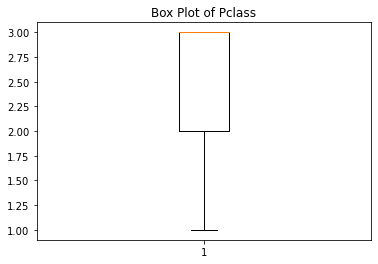

In [242]:
plt.boxplot(data['Pclass'])
plt.title('Box Plot of Pclass')

No outliers in Pclass

# Do min max scaling on the feature set (Take ‘Survived’ as target)

<AxesSubplot:>

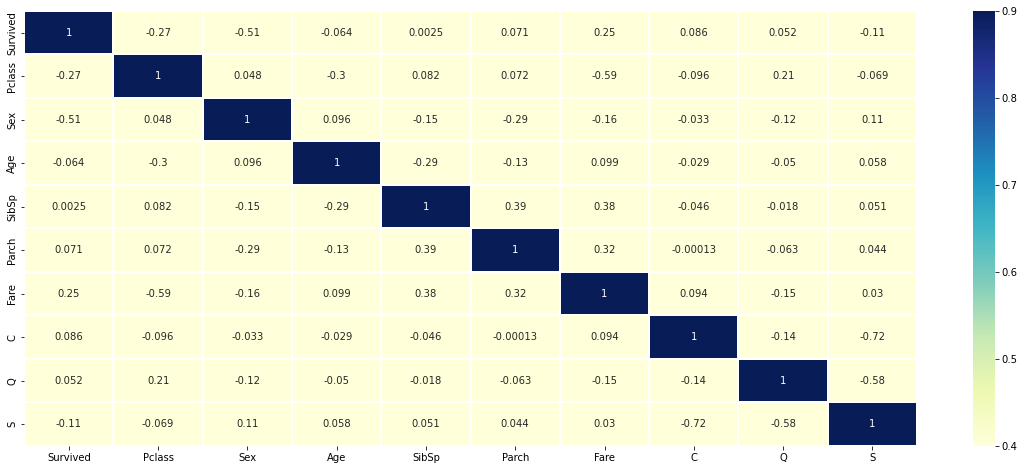

In [243]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [244]:
y = data['Survived']
x = data.drop('Survived', axis=1)

In [245]:
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,2.512535,0.681058,28.079387,0.413649,0.317549,17.193204,0.144847,0.098886,0.756267
std,0.715818,0.466391,10.012369,0.855001,0.784792,13.244507,0.352192,0.298717,0.429633
min,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.889575,0.000000,0.000000,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,11.750000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,32.875000,1.000000,0.000000,25.928150,0.000000,0.000000,1.000000
max,3.000000,1.000000,54.000000,5.000000,6.000000,61.379200,1.000000,1.000000,1.000000


In [173]:
from sklearn import preprocessing

In [247]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x=pd.DataFrame(x)

In [248]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,718.000000,718.000000,718.000000,718.00000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,0.756267,0.681058,0.491753,0.08273,0.052925,0.280114,0.144847,0.098886,0.756267
std,0.357909,0.466391,0.196321,0.17100,0.130799,0.215782,0.352192,0.298717,0.429633
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.372549,0.00000,0.000000,0.128538,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.490196,0.00000,0.000000,0.191433,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.585784,0.20000,0.000000,0.422426,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [249]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [250]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
predictions=model.predict(x_test)

In [251]:
from sklearn.metrics import mean_squared_error
print('MSE is : ', mean_squared_error(y_test, predictions))

MSE is :  0.15083048588344095


In [252]:
from sklearn.metrics import r2_score
print('R squared value is : ', r2_score(y_test, predictions))

R squared value is :  0.3281157990807665


The model is comparitively good as it has low MSE value